**<font size=5, color='red'>
MDS5102 Python Programming Final Project
</font>**
<br/><br/>
<font size=4>
Chen Fangzhou &emsp;221041024
</font>

You are supposed to use given datasets to conduct some analysis for the streaming platforms and/or compare among all platforms. Your analysis can include but not limited to following aspects.

(1) characteristics of shows in every platform

(2) operating strategies of each platform

(3) difference of contents available in different countries

(4) trend of movies and TV shows in online platforms

# Data Loading and Preprocessing

## Data loading

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('./datasets/amazon_prime_titles.csv')
df2 = pd.read_csv('./datasets/disney_plus_titles.csv')
df3 = pd.read_csv('./datasets/hulu_titles.csv')
df4 = pd.read_csv('./datasets/netflix_titles.csv')

## Basic information of the data

In [3]:
df1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [4]:
df2.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [5]:
df3.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Ricky Velez: Here's Everything,NaN,NaN,NaN,"October 24, 2021",2021,TV-MA,NaN,"Comedy, Stand Up",​Comedian Ricky Velez bares it all with his ho...
1,s2,Movie,Silent Night,NaN,NaN,NaN,"October 23, 2021",2020,NaN,94 min,"Crime, Drama, Thriller","Mark, a low end South London hitman recently r..."
2,s3,Movie,The Marksman,NaN,NaN,NaN,"October 23, 2021",2021,PG-13,108 min,"Action, Thriller",A hardened Arizona rancher tries to protect an...
3,s4,Movie,Gaia,NaN,NaN,NaN,"October 22, 2021",2021,R,97 min,Horror,A forest ranger and two survivalists with a cu...
4,s5,Movie,Settlers,NaN,NaN,NaN,"October 22, 2021",2021,NaN,104 min,"Science Fiction, Thriller",Mankind's earliest settlers on the Martian fro...


In [6]:
df4.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Shape of the data

In [7]:
df1.shape

(9668, 12)

In [8]:
df2.shape

(1450, 12)

In [9]:
df3.shape

(3073, 12)

In [10]:
df4.shape

(8807, 12)

### Columns of the data

In [11]:
# display the name of columns
df1.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

## Data preprocessing

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
show_id         9668 non-null object
type            9668 non-null object
title           9668 non-null object
director        7586 non-null object
cast            8435 non-null object
country         672 non-null object
date_added      155 non-null object
release_year    9668 non-null int64
rating          9331 non-null object
duration        9668 non-null object
listed_in       9668 non-null object
description     9668 non-null object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
show_id         1450 non-null object
type            1450 non-null object
title           1450 non-null object
director        977 non-null object
cast            1260 non-null object
country         1231 non-null object
date_added      1447 non-null object
release_year    1450 non-null int64
rating          1447 non-null object
duration        1450 non-null object
listed_in       1450 non-null object
description     1450 non-null object
dtypes: int64(1), object(11)
memory usage: 136.0+ KB


In [14]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3073 entries, 0 to 3072
Data columns (total 12 columns):
show_id         3073 non-null object
type            3073 non-null object
title           3073 non-null object
director        3 non-null object
cast            0 non-null float64
country         1620 non-null object
date_added      3045 non-null object
release_year    3073 non-null int64
rating          2553 non-null object
duration        2594 non-null object
listed_in       3073 non-null object
description     3069 non-null object
dtypes: float64(1), int64(1), object(10)
memory usage: 288.2+ KB


In [15]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
show_id         8807 non-null object
type            8807 non-null object
title           8807 non-null object
director        6173 non-null object
cast            7982 non-null object
country         7976 non-null object
date_added      8797 non-null object
release_year    8807 non-null int64
rating          8803 non-null object
duration        8804 non-null object
listed_in       8807 non-null object
description     8807 non-null object
dtypes: int64(1), object(11)
memory usage: 825.7+ KB


### Missing values

In [16]:
# check for NULL values
df1.isnull().sum()

show_id            0
type               0
title              0
director        2082
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

In [17]:
df2.isnull().sum()

show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64

In [18]:
df3.isnull().sum()

show_id            0
type               0
title              0
director        3070
cast            3073
country         1453
date_added        28
release_year       0
rating           520
duration         479
listed_in          0
description        4
dtype: int64

In [19]:
df4.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

### Duplicate values

In [20]:
# check duplicate values
df1.duplicated().sum()

0

In [21]:
df2.duplicated().sum()

0

In [22]:
df3.duplicated().sum()

0

In [23]:
df4.duplicated().sum()

0

In [24]:
# drop duplicate values
df1 = df1.drop_duplicates(inplace=False)
df2 = df2.drop_duplicates(inplace=False)
df3 = df3.drop_duplicates(inplace=False)
df4 = df4.drop_duplicates(inplace=False)

In [25]:
len(df1), len(df2), len(df3), len(df4)

(9668, 1450, 3073, 8807)

### Unique values

In [26]:
# check unique values
df1.nunique()

show_id         9668
type               2
title           9668
director        5774
cast            7927
country           86
date_added        84
release_year     100
rating            24
duration         219
listed_in        518
description     9414
dtype: int64

In [27]:
df2.nunique()

show_id         1450
type               2
title           1450
director         609
cast            1193
country           89
date_added       167
release_year      90
rating             9
duration         158
listed_in        329
description     1448
dtype: int64

In [28]:
df3.nunique()

show_id         3073
type               2
title           3073
director           3
cast               0
country          150
date_added      1115
release_year      72
rating            88
duration         135
listed_in        442
description     3057
dtype: int64

In [29]:
df4.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

### Column convertion:  convert date_added and add columns day_added, month_added, year_added

In [30]:
df1['date_added'] = pd.to_datetime(df1['date_added'])
df1['day_added'] = df1['date_added'].dt.day
df1['month_added'] = df1['date_added'].dt.month
df1['year_added'] = df1['date_added'].dt.year
df1['day_added']= df1['day_added'].fillna(0)
df1['month_added']= df1['month_added'].fillna(0)
df1['year_added']= df1['year_added'].fillna(0)
df1['day_added'] = df1['day_added'].astype(int)
df1['month_added'] = df1['month_added'].astype(int)
df1['year_added'] = df1['year_added'].astype(int)

In [31]:
df2['date_added'] = pd.to_datetime(df2['date_added'])
df2['day_added'] = df2['date_added'].dt.day
df2['month_added'] = df2['date_added'].dt.month
df2['year_added'] = df2['date_added'].dt.year
df2['day_added']= df2['day_added'].fillna(0)
df2['month_added']= df2['month_added'].fillna(0)
df2['year_added']= df2['year_added'].fillna(0)
df2['day_added'] = df2['day_added'].astype(int)
df2['month_added'] = df2['month_added'].astype(int)
df2['year_added'] = df2['year_added'].astype(int)

In [32]:
df3['date_added'] = pd.to_datetime(df3['date_added'])
df3['day_added'] = df3['date_added'].dt.day
df3['month_added'] = df3['date_added'].dt.month
df3['year_added'] = df3['date_added'].dt.year
df3['day_added']= df3['day_added'].fillna(0)
df3['month_added']= df3['month_added'].fillna(0)
df3['year_added']= df3['year_added'].fillna(0)
df3['day_added'] = df3['day_added'].astype(int)
df3['month_added'] = df3['month_added'].astype(int)
df3['year_added'] = df3['year_added'].astype(int)

In [33]:
df4['date_added'] = pd.to_datetime(df4['date_added'])
df4['day_added'] = df4['date_added'].dt.day
df4['month_added'] = df4['date_added'].dt.month
df4['year_added'] = df4['date_added'].dt.year
df4['day_added']= df4['day_added'].fillna(0)
df4['month_added']= df4['month_added'].fillna(0)
df4['year_added']= df4['year_added'].fillna(0)
df4['day_added'] = df4['day_added'].astype(int)
df4['month_added'] = df4['month_added'].astype(int)
df4['year_added'] = df4['year_added'].astype(int)

### Column convertion: convert duration and add column season

In [34]:
df1['season'] = df1.apply(lambda x : x['duration'].split(' ')[0] if 'Season' in x['duration'] else 0, axis = 1)
df1['duration'] = df1.apply(lambda x : x['duration'].split(' ')[0] if 'min' in x['duration'] else 0, axis = 1)
df1['season'] = df1['season'].astype(int)
df1['duration'] = df1['duration'].astype(int)
df1['rating'] = df1['rating'].fillna('NR')

In [35]:
df2['season'] = df2.apply(lambda x : x['duration'].split(' ')[0] if 'Season' in x['duration'] else 0, axis = 1)
df2['duration'] = df2.apply(lambda x : x['duration'].split(' ')[0] if 'min' in x['duration'] else 0, axis = 1)
df2['season'] = df2['season'].astype(int)
df2['duration'] = df2['duration'].astype(int)
df2['rating'] = df2['rating'].fillna('NR')

In [36]:
df3['duration'] = df3['duration'].fillna(0)
df3['duration'] = df3['duration'].astype(str)
df3['season'] = df3.apply(lambda x : x['duration'].split(' ')[0] if 'Season' in x['duration'] else 0, axis = 1)
df3['duration'] = df3.apply(lambda x : x['duration'].split(' ')[0] if 'min' in x['duration'] else 0, axis = 1)
df3['rating'] = df3['rating'].fillna('NR')
df3['season'] = df3.apply(lambda x : x['rating'].split(' ')[0] if 'Season' in x['rating'] else x['season'], axis = 1)
df3['duration'] = df3.apply(lambda x : x['rating'].split(' ')[0] if 'min' in x['rating'] else x['duration'], axis = 1)
df3['season'] = df3['season'].astype(int)
df3['duration'] = df3['duration'].astype(int)
df3['rating'] = df3['rating'].apply(lambda x : x if 'Season' not in x else 'NR')
df3['rating'] = df3['rating'].apply(lambda x : x if 'min' not in x else 'NR')

In [37]:
df4['duration']= df4['duration'].fillna(0)
df4['duration']= df4['duration'].astype(str)
df4['season'] = df4.apply(lambda x : x['duration'].split(' ')[0] if 'Season' in x['duration'] else 0, axis = 1)
df4['duration'] = df4.apply(lambda x : x['duration'].split(' ')[0] if 'min' in x['duration'] else 0, axis = 1)
df4['rating'] = df4['rating'].fillna('NR')
df4['season'] = df4.apply(lambda x : x['rating'].split(' ')[0] if 'Season' in x['rating'] else x['season'], axis = 1)
df4['duration'] = df4.apply(lambda x : x['rating'].split(' ')[0] if 'min' in x['rating'] else x['duration'], axis = 1)
df4['season'] = df4['season'].astype(int)
df4['duration'] = df4['duration'].astype(int)
df4['rating'] = df4['rating'].apply(lambda x : x if 'Season' not in x else 'NR')
df4['rating'] = df4['rating'].apply(lambda x : x if 'min' not in x else 'NR')

### Column convertion:  rating

In [38]:
df1.rating.unique(), df2.rating.unique(), df3.rating.unique(), df4.rating.unique()

(array(['NR', '13+', 'ALL', '18+', 'R', 'TV-Y', 'TV-Y7', '16+', 'TV-PG',
        '7+', 'TV-14', 'TV-NR', 'TV-G', 'PG-13', 'TV-MA', 'G', 'PG',
        'NC-17', 'UNRATED', '16', 'AGES_16_', 'AGES_18_', 'ALL_AGES',
        'NOT_RATE'], dtype=object),
 array(['TV-G', 'PG', 'TV-PG', 'NR', 'PG-13', 'TV-14', 'G', 'TV-Y7',
        'TV-Y', 'TV-Y7-FV'], dtype=object),
 array(['TV-MA', 'NR', 'PG-13', 'R', 'TV-14', 'PG', 'TV-PG', 'NOT RATED',
        'G', 'TV-G', 'TV-Y', 'TV-Y7'], dtype=object),
 array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
        'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object))

In [39]:
# set of rating
print(set(list(df1.rating.unique()) + list(df2.rating.unique()) + list(df3.rating.unique()) + list(df4.rating.unique())))

{'UR', 'TV-NR', 'TV-Y', 'NOT RATED', 'R', 'ALL', '7+', 'UNRATED', 'ALL_AGES', '16+', 'G', 'TV-Y7', 'TV-MA', 'TV-G', 'TV-PG', '16', 'AGES_16_', '13+', 'PG-13', 'TV-Y7-FV', 'TV-14', 'PG', 'AGES_18_', 'NR', 'NOT_RATE', '18+', 'NC-17'}


In [40]:
def label_rating(rating):
    if rating in rating_all:
        rating = 'All Ages'
    elif rating in rating_adults:
        rating = 'Adults'
    elif rating in rating_teens:
        rating = 'Teens'
    elif rating in rating_older_children:
        rating = 'Older Children'
    elif rating in rating_younger_children:
        rating = 'Younger Children'
    else:
        rating = 'Not Rated'
    return rating

# label the rating
rating_all = ['TV-G', 'ALL', 'ALL_AGES', 'G']
rating_adults = ['TV-MA', 'R', 'NC-17', 'AGES_18_', '18+', '16+', '16', 'AGES_16_', 'UR']
rating_teens = ['TV-14', 'PG-13', '13+']
rating_older_children = ['TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG', '7+']
rating_younger_children = ['TV-Y']
rating_not = ['TV-NR', 'NR', 'NOT RATED', 'NOT_RATE', 'UNRATED']

df1['rating'] = df1['rating'].apply(label_rating)
df2['rating'] = df2['rating'].apply(label_rating)
df3['rating'] = df3['rating'].apply(label_rating)
df4['rating'] = df4['rating'].apply(label_rating)

### Unique values (updated)

In [41]:
# check unique values
df1.nunique()

show_id         9668
type               2
title           9668
director        5774
cast            7927
country           86
date_added        84
release_year     100
rating             6
duration         202
listed_in        518
description     9414
day_added         30
month_added        9
year_added         2
season            18
dtype: int64

In [42]:
df2.nunique()

show_id         1450
type               2
title           1450
director         609
cast            1193
country           89
date_added       167
release_year      90
rating             5
duration         146
listed_in        329
description     1448
day_added         32
month_added       13
year_added         4
season            14
dtype: int64

In [43]:
df3.nunique()

show_id         3073
type               2
title           3073
director           3
cast               0
country          150
date_added      1115
release_year      72
rating             6
duration         120
listed_in        442
description     3057
day_added         32
month_added       13
year_added        16
season            27
dtype: int64

In [44]:
df4.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1714
release_year      74
rating             6
duration         206
listed_in        514
description     8775
day_added         32
month_added       13
year_added        15
season            16
dtype: int64

# Exploratory Data Analysis and Visualization

In [45]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns

In [46]:
# concatenate all data
df = pd.concat([df1, df2, df3, df4])
df = df.reset_index(drop=True)

In [47]:
df.shape

(22998, 16)

## Describe the data

In [48]:
df.describe(include=['O'])

,show_id,type,title,director,cast,country,rating,listed_in,description
count,22998,22998,22998,14739,17677,11499,22998,22998,22994
unique,9668,2,22115,10106,16748,886,6,1687,22670
top,s1261,Movie,The Girl King,Mark Knight,Maggie Binkley,United States,Adults,Drama,1
freq,4,16481,3,113,56,4997,8634,1061,15


In [49]:
df1.describe(include=['O'])

,show_id,type,title,director,cast,country,rating,listed_in,description
count,9668,9668,9668,7586,8435,672,9668,9668,9668
unique,9668,2,9668,5774,7927,86,6,518,9414
top,s3527,Movie,Fury of the Fist and The Golden Fleece,Mark Knight,Maggie Binkley,United States,Adults,Drama,1
freq,1,7814,1,113,56,253,3886,986,15


In [50]:
df2.describe(include=['O'])

,show_id,type,title,director,cast,country,rating,listed_in,description
count,1450,1450,1450,977,1260,1231,1450,1450,1450
unique,1450,2,1450,609,1193,89,5,329,1448
top,s1033,Movie,Disney Insider,Jack Hannah,Winston Hibler,United States,Older Children,"Animation, Comedy, Family","Cooper and Cami Wrather co-host ""Would You Wra..."
freq,1,1052,1,17,10,1005,681,124,2


In [51]:
df3.describe(include=['O'])

,show_id,type,title,director,country,rating,listed_in,description
count,3073,3073,3073,3,1620,3073,3073,3069
unique,3073,2,3073,3,150,6,442,3057
top,s2568,TV Show,Westworld,Director Alex Winter goes inside the biggest g...,United States,Teens,Documentaries,Reality show. Glamorous singles live in a beau...
freq,1,1589,1,1,921,854,214,2


In [52]:
df4.describe(include=['O'])

,show_id,type,title,director,cast,country,rating,listed_in,description
count,8807,8807,8807,6173,7982,7976,8807,8807,8807
unique,8807,2,8807,4528,7692,748,6,514,8775
top,s3527,Movie,Kavin Jay: Everybody Calm Down!,Rajiv Chilaka,David Attenborough,United States,Adults,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,4012,362,4


## Type

In [53]:
df['type'].value_counts()

Movie      16481
TV Show     6517
Name: type, dtype: int64

In [54]:
df1['type'].value_counts()

Movie      7814
TV Show    1854
Name: type, dtype: int64

In [55]:
df2['type'].value_counts()

Movie      1052
TV Show     398
Name: type, dtype: int64

In [56]:
df3['type'].value_counts()

TV Show    1589
Movie      1484
Name: type, dtype: int64

In [57]:
df4['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

### Pie chart

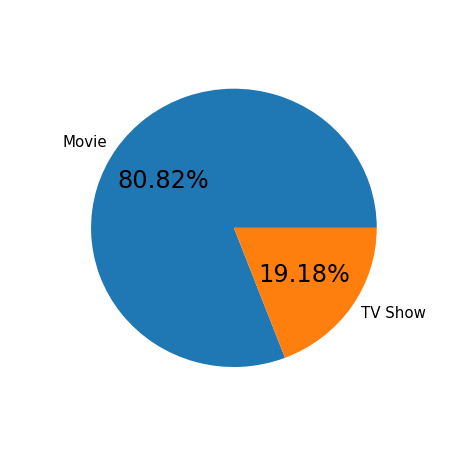

In [58]:
plt.figure(figsize = (8,8))
patches,l_text,p_text = plt.pie(df1['type'].value_counts().values, labels=df1['type'].value_counts().index, 
                autopct = '%.2f%%', radius=0.8, labeldistance=1.08)

for t in p_text:
    t.set_size(24)

for t in l_text:
    t.set_size(15)
    
plt.show()

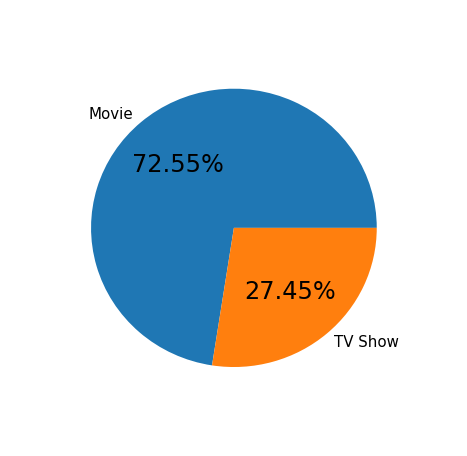

In [59]:
plt.figure(figsize = (8,8))
patches,l_text,p_text = plt.pie(df2['type'].value_counts().values, labels=df2['type'].value_counts().index, 
                autopct = '%.2f%%', radius=0.8, labeldistance=1.08)

for t in p_text:
    t.set_size(24)

for t in l_text:
    t.set_size(15)
    
plt.show()

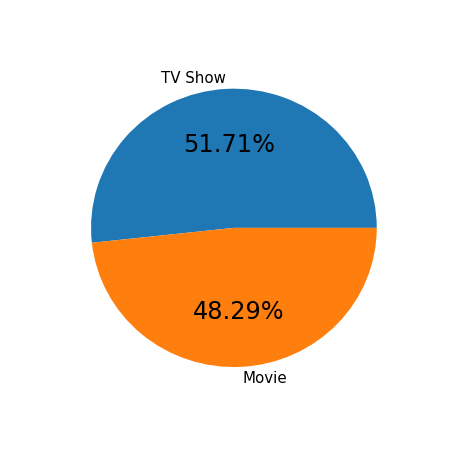

In [60]:
plt.figure(figsize = (8,8))
patches,l_text,p_text = plt.pie(df3['type'].value_counts().values, labels=df3['type'].value_counts().index, 
                autopct = '%.2f%%', radius=0.8, labeldistance=1.08)

for t in p_text:
    t.set_size(24)

for t in l_text:
    t.set_size(15)
    
plt.show()

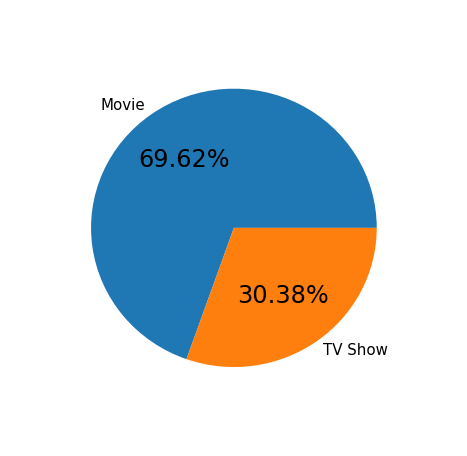

In [61]:
plt.figure(figsize = (8,8))
patches,l_text,p_text = plt.pie(df4['type'].value_counts().values, labels=df4['type'].value_counts().index, 
                autopct = '%.2f%%', radius=0.8, labeldistance=1.08)

for t in p_text:
    t.set_size(24)

for t in l_text:
    t.set_size(15)
    
plt.show()

## Title

### Word cloud

In [62]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

stopwords = set(STOPWORDS)

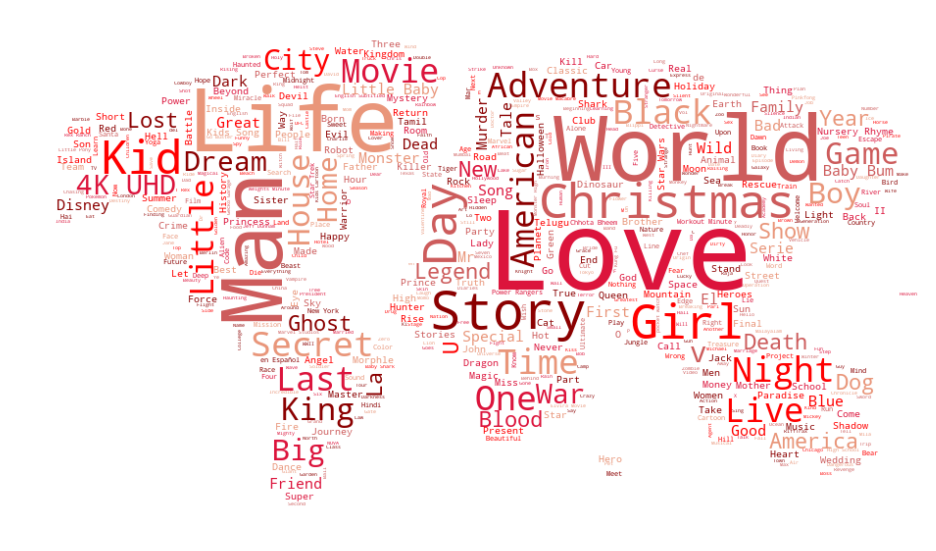

In [63]:
# word cloud
plt.figure(figsize=(16, 12))
backgroud_Image = plt.imread('global_map.jpg')

wc_title = WordCloud(
    background_color = 'white',
    mask = backgroud_Image,
    colormap = colors.ListedColormap(['#8B0000', '#FF0000', '#E9967A', '#DC143C', '#CD5C5C']),
    #8B0000 darkred, #FF0000 red, #E9967A darksalmon, #DC143C crimson 深红色, #CD5C5C indianred
    max_words = 900,
    stopwords = stopwords).generate(','.join(df.title.values))

plt.imshow(wc_title, interpolation='bilinear')
plt.axis('off')
plt.show()

## Rating

In [64]:
df['rating'].value_counts()

Adults              8634
Teens               6367
Older Children      3489
All Ages            2441
Not Rated           1605
Younger Children     462
Name: rating, dtype: int64

In [65]:
rating_df = df.groupby('rating')[['show_id']].count()
rating_df

,show_id
rating,
Adults,8634
All Ages,2441
Not Rated,1605
Older Children,3489
Teens,6367
Younger Children,462


In [66]:
df.groupby('rating')[['show_id']].count().sort_values(by = ['show_id'], ascending = False)

,show_id
rating,
Adults,8634
Teens,6367
Older Children,3489
All Ages,2441
Not Rated,1605
Younger Children,462


### Groupby

In [67]:
df.groupby(['type','rating'])[['show_id']].count()

show_id
type    rating                   
Movie   Adults               6690
        All Ages             1789
        Not Rated            1226
        Older Children       2129
        Teens                4507
        Younger Children      140
TV Show Adults               1944
        All Ages              652
        Not Rated             379
        Older Children       1360
        Teens                1860
        Younger Children      322

### Pie chart

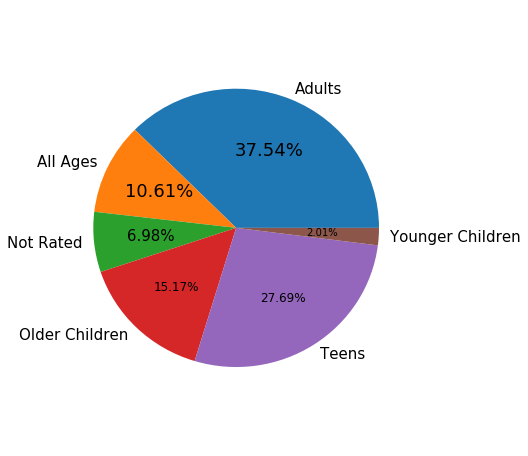

In [68]:
plt.figure(figsize = (8,8))
patches,l_text,p_text = plt.pie(rating_df['show_id'], labels=rating_df.index, 
                                autopct = '%.2f%%', radius=0.8, labeldistance=1.08)
# plt.title('Content by Rating Ages', fontsize = 20)
# plt.legend(rating_df.index)
# plt.legend(loc='lower left')

for t in p_text[:2]:
    t.set_size(18)

for t in p_text[2:3]:
    t.set_size(15)
    
for t in p_text[3:5]:
    t.set_size(12)

for t in l_text:
    t.set_size(15)

plt.show()

## Country

In [69]:
country_list = []
for i in df['country']:
    if i is not np.nan:
        co = i.split(', ')
        for j in range(len(co)):
            if ',' in co[j]:
                co[j] = co[j][:-1]
            if co[j] == '':
                continue
            if co[j] in country_list:
                continue
            else:
                country_list.append(co[j])

country_count = []
for item in country_list:
    num = 0
    for i in df['country']:
        if i is not np.nan:
            co = i.split(', ')
            for j in range(len(co)):
                if co[j] == item:
                    num += 1
                else:
                    continue
    country_count.append(num)

In [70]:
country_df = pd.DataFrame(columns = ['name', 'count']) 
country_df['name'] = country_list
country_df['count'] = country_count
country_df = country_df.sort_values(by = ['count'], ascending = False)
country_df = country_df.reset_index()[['name', 'count']]
country_df

,name,count
0,United States,6304
1,India,1299
2,United Kingdom,1172
3,Canada,645
4,Japan,615
5,France,475
6,Germany,293
7,South Korea,260
8,Spain,258
9,Australia,225


In [71]:
country_list1 = []
for i in df1['country']:
    if i is not np.nan:
        co = i.split(', ')
        for j in range(len(co)):
            if co[j] in country_list1:
                continue
            else:
                country_list1.append(co[j])

country_count1 = []
for item in country_list1:
    num = 0
    for i in df1['country']:
        if i is not np.nan:
            co = i.split(', ')
            for j in range(len(co)):
                if co[j] == item:
                    num += 1
                else:
                    continue
    country_count1.append(num)

In [72]:
country_list2 = []
for i in df2['country']:
    if i is not np.nan:
        co = i.split(', ')
        for j in range(len(co)):
            if co[j] in country_list2:
                continue
            else:
                country_list2.append(co[j])

country_count2 = []
for item in country_list2:
    num = 0
    for i in df2['country']:
        if i is not np.nan:
            co = i.split(', ')
            for j in range(len(co)):
                if co[j] == item:
                    num += 1
                else:
                    continue
    country_count2.append(num)

In [73]:
country_list3 = []
for i in df3['country']:
    if i is not np.nan:
        co = i.split(', ')
        for j in range(len(co)):
            if co[j] in country_list3:
                continue
            else:
                country_list3.append(co[j])

country_count3 = []
for item in country_list3:
    num = 0
    for i in df3['country']:
        if i is not np.nan:
            co = i.split(', ')
            for j in range(len(co)):
                if co[j] == item:
                    num += 1
                else:
                    continue
    country_count3.append(num)

In [74]:
country_list4 = []
for i in df4['country']:
    if i is not np.nan:
        co = i.split(', ')
        for j in range(len(co)):
            if ',' in co[j]:
                co[j] = co[j][:-1]
            if co[j] == '':
                continue
            if co[j] in country_list4:
                continue
            else:
                country_list4.append(co[j])

country_count4 = []
for item in country_list4:
    num = 0
    for i in df4['country']:
        if i is not np.nan:
            co = i.split(', ')
            for j in range(len(co)):
                if co[j] == item:
                    num += 1
                else:
                    continue
    country_count4.append(num)

In [75]:
country_df1 = pd.DataFrame(columns = ['name', 'count']) 
country_df1['name'] = country_list1
country_df1['count'] = country_count1
country_df1 = country_df1.sort_values(by = ['count'], ascending = False)
country_df1 = country_df1.reset_index()[['name', 'count']]
country_df1

,name,count
0,United States,334
1,India,246
2,United Kingdom,67
3,Canada,35
4,France,20
5,Germany,17
6,Italy,14
7,Spain,11
8,Denmark,6
9,Japan,6


In [76]:
country_df2 = pd.DataFrame(columns = ['name', 'count']) 
country_df2['name'] = country_list2
country_df2['count'] = country_count2
country_df2 = country_df2.sort_values(by = ['count'], ascending = False)
country_df2 = country_df2.reset_index()[['name', 'count']]
country_df2

,name,count
0,United States,1184
1,United Kingdom,101
2,Canada,77
3,Australia,23
4,France,22
5,South Korea,13
6,China,10
7,Japan,10
8,Germany,9
9,Ireland,8


In [77]:
country_df3 = pd.DataFrame(columns = ['name', 'count']) 
country_df3['name'] = country_list3
country_df3['count'] = country_count3
country_df3 = country_df3.sort_values(by = ['count'], ascending = False)
country_df3 = country_df3.reset_index()[['name', 'count']]
country_df3

,name,count
0,United States,1097
1,Japan,281
2,United Kingdom,200
3,Canada,88
4,Germany,41
5,France,40
6,Australia,36
7,Sweden,20
8,Denmark,17
9,South Korea,15


In [78]:
country_df4 = pd.DataFrame(columns = ['name', 'count']) 
country_df4['name'] = country_list4
country_df4['count'] = country_count4
country_df4 = country_df4.sort_values(by = ['count'], ascending = False)
country_df4 = country_df4.reset_index()[['name', 'count']]
country_df4

,name,count
0,United States,3689
1,India,1046
2,United Kingdom,804
3,Canada,445
4,France,393
5,Japan,318
6,Spain,232
7,South Korea,231
8,Germany,226
9,Mexico,169


In [79]:
country_list

['Canada',
 'India',
 'United States',
 'United Kingdom',
 'France',
 'Spain',
 'Italy',
 'Germany',
 'Japan',
 'China',
 'Denmark',
 'Czech Republic',
 'Netherlands',
 'Ireland',
 'Thailand',
 'Brazil',
 'Switzerland',
 'Australia',
 'Belgium',
 'Chile',
 'Argentina',
 'Mexico',
 'Sweden',
 'New Zealand',
 'Portugal',
 'Hungary',
 'Iran',
 'Luxembourg',
 'South Africa',
 'Austria',
 'Monaco',
 'Egypt',
 'United Arab Emirates',
 'Singapore',
 'South Korea',
 'Afghanistan',
 'Colombia',
 'Norway',
 'Kosovo',
 'Kazakhstan',
 'Malaysia',
 'Poland',
 'Albania',
 'Georgia',
 'Hong Kong',
 'Taiwan',
 'Philippines',
 'Tanzania',
 'Panama',
 'Angola',
 'Botswana',
 'Namibia',
 'Guatemala',
 'Russia',
 'Syria',
 'Pakistan',
 'Slovenia',
 'Israel',
 'Ukraine',
 'Malta',
 'Bulgaria',
 'Tunisia',
 'Romania',
 'Serbia',
 'Montenegro',
 'Costa Rica',
 'French Polynesia',
 'Saudi Arabia',
 'Uruguay',
 'Qatar',
 'Venezuela',
 'Finland',
 'Greece',
 'Iceland',
 'Ghana',
 'Burkina Faso',
 'Ethiopia',
 '

In [80]:
len(country_df), len(country_df1), len(country_df2), len(country_df3), len(country_df4)

(128, 45, 47, 57, 122)

### Heat map

In [81]:
from pyecharts import options as opts
from pyecharts.charts import Map
from pyecharts.faker import Faker

In [82]:
country_data = [['United States', 6304],
 ['India', 1299],
 ['United Kingdom', 1172],
 ['Canada', 645],
 ['Japan', 615],
 ['France', 475],
 ['Germany', 293],
 ['South Korea', 260],
 ['Spain', 258],
 ['Australia', 225],
 ['Mexico', 185],
 ['China', 184],
 ['Italy', 126],
 ['Egypt', 119],
 ['Hong Kong', 113],
 ['Turkey', 113],
 ['Belgium', 109],
 ['Brazil', 104],
 ['Nigeria', 103],
 ['Argentina', 97],
 ['Taiwan', 96],
 ['Indonesia', 90],
 ['Philippines', 86],
 ['Denmark', 74],
 ['Thailand', 73],
 ['Ireland', 70],
 ['South Africa', 68],
 ['Sweden', 66],
 ['Colombia', 58],
 ['Netherlands', 57],
 ['Poland', 45],
 ['Singapore', 45],
 ['United Arab Emirates', 43],
 ['New Zealand', 42],
 ['Norway', 39],
 ['Israel', 33],
 ['Russia', 32],
 ['Chile', 32],
 ['Lebanon', 31],
 ['Malaysia', 29],
 ['Czech Republic', 28],
 ['Switzerland', 27],
 ['Pakistan', 25],
 ['Austria', 19],
 ['Luxembourg', 17],
 ['Romania', 17],
 ['Hungary', 16],
 ['Bulgaria', 15],
 ['Uruguay', 15],
 ['Saudi Arabia', 14],
 ['Finland', 14],
 ['Greece', 12],
 ['Iceland', 12],
 ['Qatar', 11],
 ['Peru', 10],
 ['Jordan', 9],
 ['Kuwait', 8],
 ['Serbia', 8],
 ['Vietnam', 7],
 ['Portugal', 7],
 ['Iran', 6],
 ['Morocco', 6],
 ['Kenya', 6],
 ['West Germany', 5],
 ['Venezuela', 5],
 ['Syria', 5],
 ['Cambodia', 5],
 ['Ghana', 5],
 ['Ukraine', 4],
 ['Croatia', 4],
 ['Malta', 4],
 ['Bangladesh', 4],
 ['Slovenia', 4],
 ['Zimbabwe', 3],
 ['Kazakhstan', 3],
 ['Namibia', 3],
 ['Soviet Union', 3],
 ['Afghanistan', 3],
 ['Guatemala', 3],
 ['Algeria', 3],
 ['Senegal', 3],
 ['Georgia', 3],
 ['Iraq', 2],
 ['Cayman Islands', 2],
 ['Mauritius', 2],
 ['Montenegro', 2],
 ['Nepal', 2],
 ['Botswana', 2],
 ['Kosovo', 2],
 ['Albania', 2],
 ['Panama', 2],
 ['Angola', 2],
 ['Jamaica', 1],
 ['Cuba', 1],
 ['Bahamas', 1],
 ['Sri Lanka', 1],
 ['Uganda', 1],
 ['Sudan', 1],
 ['Latvia', 1],
 ['Liechtenstein', 1],
 ['Somalia', 1],
 ['Vatican City', 1],
 ['Nicaragua', 1],
 ['Dominican Republic', 1],
 ['Armenia', 1],
 ['Samoa', 1],
 ['Azerbaijan', 1],
 ['Lithuania', 1],
 ['Mongolia', 1],
 ['Slovakia', 1],
 ['Ecuador', 1],
 ['Bermuda', 1],
 ['Palestine', 1],
 ['Ethiopia', 1],
 ['Burkina Faso', 1],
 ['French Polynesia', 1],
 ['Costa Rica', 1],
 ['Tunisia', 1],
 ['Mozambique', 1],
 ['Belarus', 1],
 ['Puerto Rico', 1],
 ['Cyprus', 1],
 ['Malawi', 1],
 ['Paraguay', 1],
 ['Tanzania', 1],
 ['Monaco', 1],
 ['Cameroon', 1],
 ['East Germany', 1]]

map0 = Map().add('Number',
    country_data, maptype='world'
).set_series_opts(
    label_opts=opts.LabelOpts(is_show=False)
).set_global_opts(
    title_opts=opts.TitleOpts(),
    visualmap_opts=opts.VisualMapOpts(max_=1000)
)
map0.render(path='All-Countries-by-Content.html')

'D:\\Python\\MDS5102\\Project\\All-Countries-by-Content.html'

### Bar chart

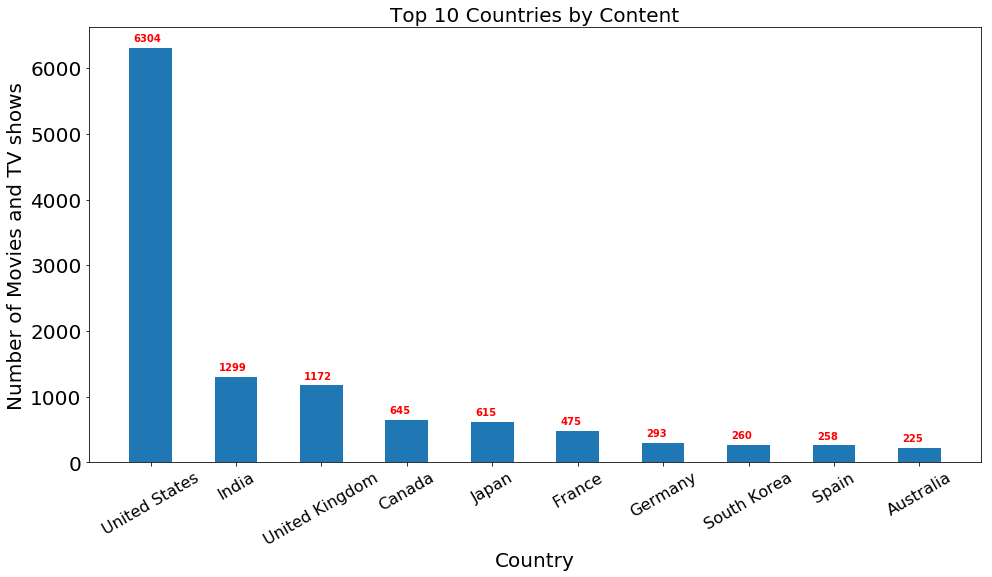

In [83]:
# top10 countries
plt.figure(figsize = (16, 8))
plt.bar(country_df.name[:10], height = country_df['count'][:10], width = 0.5)
plt.title('Top 10 Countries by Content', fontsize = 20)
plt.xticks(fontsize = 16, rotation=30)
plt.yticks(fontsize = 20)
plt.xlabel('Country', fontsize = 20)
plt.ylabel('Number of Movies and TV shows', fontsize = 20)
for h, v in enumerate(country_df['count'][:10]):
    plt.text(h - 0.2, v + 100, str(v), color='r', fontweight='bold')
plt.show()

In [84]:
def select_country(co):
    df_co = df[df['country'].notnull()][df[df['country'].notnull()]['country'].str.contains(co)]
    return df_co

## Genres

### Word cloud

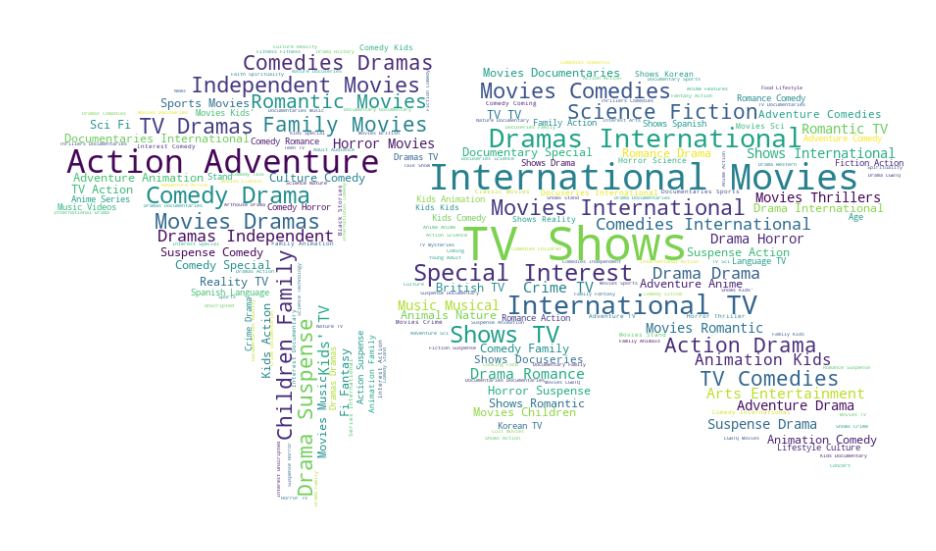

In [85]:
plt.figure(figsize=(16, 12))
backgroud_Image = plt.imread('global_map.jpg')

wc_list = WordCloud(
    background_color = 'white',
    mask = backgroud_Image,
    stopwords = stopwords).generate(','.join(df.listed_in.values))

plt.imshow(wc_list, interpolation='bilinear')
plt.axis('off')
plt.show()

In [86]:
listed_list = []
for i in df['listed_in']:
    if i is not np.nan:
        l = i.split(', ')
        for j in range(len(l)):
            if l[j] in listed_list:
                continue
            else:
                listed_list.append(l[j])

listed_count = []
for item in listed_list:
    num = 0
    for i in df['listed_in']:
        if i is not np.nan:
            l = i.split(', ')
            for j in range(len(l)):
                if l[j] == item:
                    num += 1
                else:
                    continue
    listed_count.append(num)

In [87]:
listed_df = pd.DataFrame(columns = ['name', 'count']) 
listed_df['name'] = listed_list
listed_df['count'] = listed_count
listed_df = listed_df.sort_values(by = ['count'], ascending = False)
listed_df = listed_df.reset_index()[['name', 'count']]
listed_df

,name,count
0,Drama,4728
1,Comedy,3292
2,International Movies,2752
3,Dramas,2427
4,Action,2212
5,Comedies,1674
6,Suspense,1501
7,Documentaries,1393
8,Kids,1388
9,International TV Shows,1351


In [88]:
listed_list1 = []
for i in df1['listed_in']:
    if i is not np.nan:
        l = i.split(', ')
        for j in range(len(l)):
            if l[j] in listed_list1:
                continue
            else:
                listed_list1.append(l[j])

listed_count1 = []
for item in listed_list1:
    num = 0
    for i in df1['listed_in']:
        if i is not np.nan:
            l = i.split(', ')
            for j in range(len(l)):
                if l[j] == item:
                    num += 1
                else:
                    continue
    listed_count1.append(num)

In [89]:
listed_df1 = pd.DataFrame(columns = ['name', 'count']) 
listed_df1['name'] = listed_list1
listed_df1['count'] = listed_count1
listed_df1 = listed_df1.sort_values(by = ['count'], ascending = False)
listed_df1 = listed_df1.reset_index()[['name', 'count']]
listed_df1

,name,count
0,Drama,3687
1,Comedy,2099
2,Action,1657
3,Suspense,1501
4,Kids,1085
5,Documentary,993
6,Special Interest,980
7,Horror,875
8,Romance,674
9,Animation,547


In [90]:
listed_list2 = []
for i in df2['listed_in']:
    if i is not np.nan:
        l = i.split(', ')
        for j in range(len(l)):
            if l[j] in listed_list2:
                continue
            else:
                listed_list2.append(l[j])

listed_count2 = []
for item in listed_list2:
    num = 0
    for i in df2['listed_in']:
        if i is not np.nan:
            l = i.split(', ')
            for j in range(len(l)):
                if l[j] == item:
                    num += 1
                else:
                    continue
    listed_count2.append(num)

In [91]:
listed_df2 = pd.DataFrame(columns = ['name', 'count']) 
listed_df2['name'] = listed_list2
listed_df2['count'] = listed_count2
listed_df2 = listed_df2.sort_values(by = ['count'], ascending = False)
listed_df2 = listed_df2.reset_index()[['name', 'count']]
listed_df2

,name,count
0,Family,632
1,Animation,542
2,Comedy,526
3,Action-Adventure,452
4,Animals & Nature,208
5,Coming of Age,205
6,Fantasy,192
7,Documentary,174
8,Kids,141
9,Drama,134


In [92]:
listed_list3 = []
for i in df3['listed_in']:
    if i is not np.nan:
        l = i.split(', ')
        for j in range(len(l)):
            if l[j] in listed_list3:
                continue
            else:
                listed_list3.append(l[j])

listed_count3 = []
for item in listed_list3:
    num = 0
    for i in df3['listed_in']:
        if i is not np.nan:
            l = i.split(', ')
            for j in range(len(l)):
                if l[j] == item:
                    num += 1
                else:
                    continue
    listed_count3.append(num)

In [93]:
listed_df3 = pd.DataFrame(columns = ['name', 'count']) 
listed_df3['name'] = listed_list3
listed_df3['count'] = listed_count3
listed_df3 = listed_df3.sort_values(by = ['count'], ascending = False)
listed_df3 = listed_df3.reset_index()[['name', 'count']]
listed_df3

,name,count
0,Drama,907
1,Comedy,667
2,Adventure,556
3,Action,555
4,Documentaries,524
5,Anime,329
6,Horror,304
7,Reality,247
8,Thriller,231
9,Crime,217


In [94]:
listed_list4 = []
for i in df4['listed_in']:
    if i is not np.nan:
        l = i.split(', ')
        for j in range(len(l)):
            if l[j] in listed_list4:
                continue
            else:
                listed_list4.append(l[j])

listed_count4 = []
for item in listed_list4:
    num = 0
    for i in df4['listed_in']:
        if i is not np.nan:
            l = i.split(', ')
            for j in range(len(l)):
                if l[j] == item:
                    num += 1
                else:
                    continue
    listed_count4.append(num)

In [95]:
listed_df4 = pd.DataFrame(columns = ['name', 'count']) 
listed_df4['name'] = listed_list4
listed_df4['count'] = listed_count4
listed_df4 = listed_df4.sort_values(by = ['count'], ascending = False)
listed_df4 = listed_df4.reset_index()[['name', 'count']]
listed_df4

,name,count
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,International TV Shows,1351
4,Documentaries,869
5,Action & Adventure,859
6,TV Dramas,763
7,Independent Movies,756
8,Children & Family Movies,641
9,Romantic Movies,616


### Bar chart

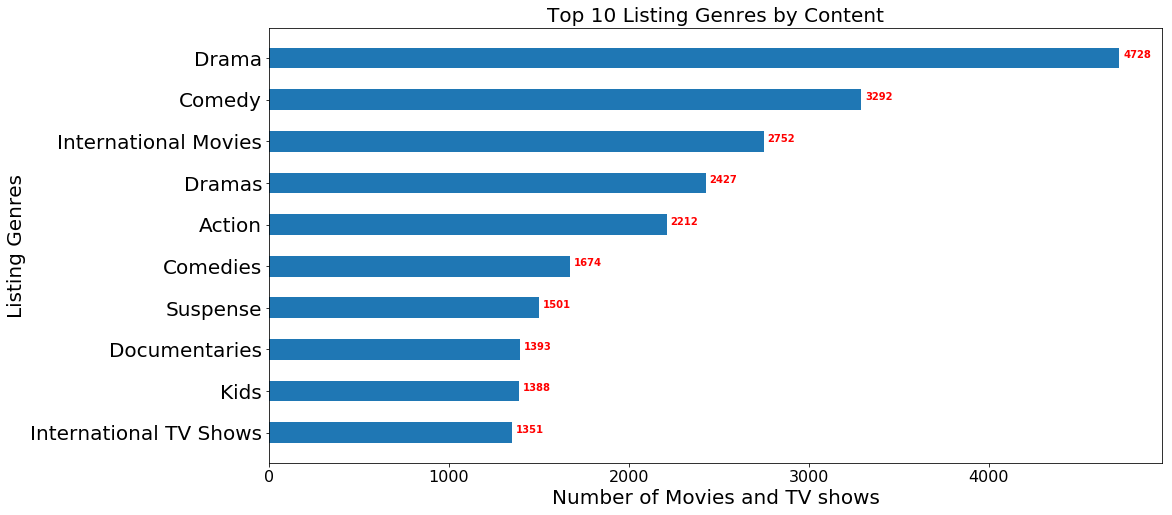

In [96]:
# top10 listing genres
plt.figure(figsize = (16, 8))
plt.barh(listed_df.name[:10][::-1], width = listed_df['count'][:10][::-1], height = 0.5)
plt.title('Top 10 Listing Genres by Content', fontsize = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 20)
plt.xlabel('Number of Movies and TV shows', fontsize = 20)
plt.ylabel('Listing Genres', fontsize = 20)
for h, v in enumerate(listed_df['count'][:10][::-1]):
    plt.text(v + 20, h, str(v), color='r', fontweight='bold')
plt.show()

## Release year

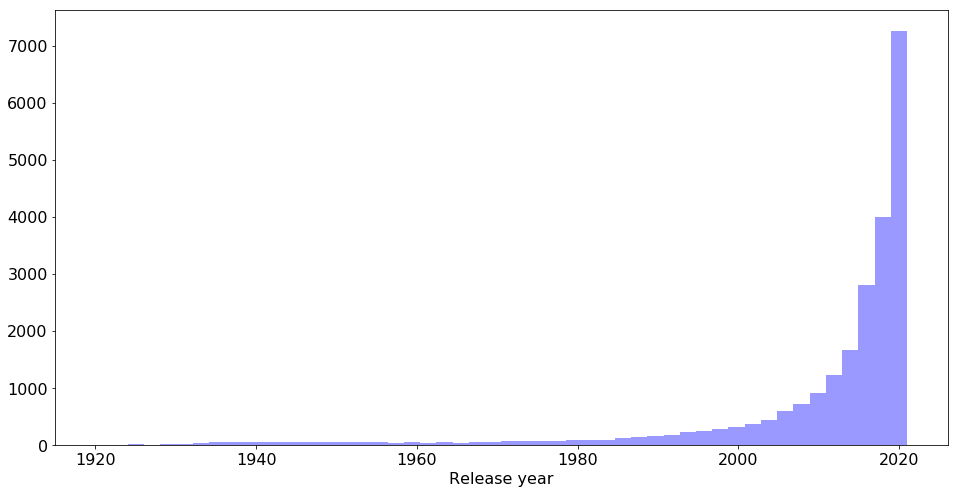

In [97]:
# overall year of release analysis
plt.subplots(figsize=(16, 8))
sns.distplot(df['release_year'], kde=False, color='b')
plt.xlabel('Release year', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

## Characteristics of shows in every platform

### Rating on each platform

In [98]:
df1['rating'].value_counts()

Adults              3886
Teens               2718
All Ages            1443
Older Children       846
Not Rated            701
Younger Children      74
Name: rating, dtype: int64

In [99]:
rating_df1 = df1.groupby('rating')[['show_id']].count()
rating_df1

,show_id
rating,
Adults,3886
All Ages,1443
Not Rated,701
Older Children,846
Teens,2718
Younger Children,74


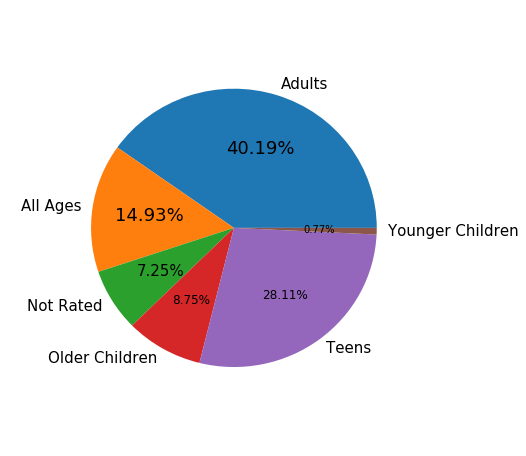

In [100]:
plt.figure(figsize = (8,8))
patches,l_text,p_text = plt.pie(rating_df1['show_id'], labels=rating_df1.index, 
                                autopct = '%.2f%%', radius=0.8, labeldistance=1.08)
# plt.title('Content by Rating Ages', fontsize = 20)
# plt.legend(rating_df.index)
# plt.legend(loc='lower left')

for t in p_text[:2]:
    t.set_size(18)

for t in p_text[2:3]:
    t.set_size(15)
    
for t in p_text[3:5]:
    t.set_size(12)

for t in l_text:
    t.set_size(15)

plt.show()

In [101]:
df2['rating'].value_counts()

Older Children      681
All Ages            571
Teens               145
Younger Children     50
Not Rated             3
Name: rating, dtype: int64

In [102]:
rating_df2 = df2.groupby('rating')[['show_id']].count()
rating_df2

,show_id
rating,
All Ages,571
Not Rated,3
Older Children,681
Teens,145
Younger Children,50


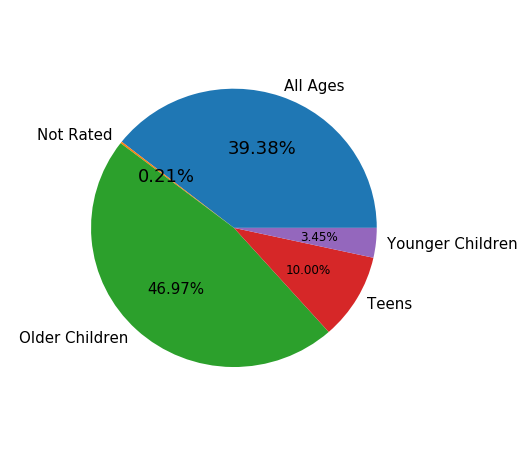

In [103]:
plt.figure(figsize = (8,8))
patches,l_text,p_text = plt.pie(rating_df2['show_id'], labels=rating_df2.index, 
                                autopct = '%.2f%%', radius=0.8, labeldistance=1.08)
# plt.title('Content by Rating Ages', fontsize = 20)
# plt.legend(rating_df.index)
# plt.legend(loc='lower left')

for t in p_text[:2]:
    t.set_size(18)

for t in p_text[2:3]:
    t.set_size(15)
    
for t in p_text[3:5]:
    t.set_size(12)

for t in l_text:
    t.set_size(15)

plt.show()

In [104]:
df3['rating'].value_counts()

Teens               854
Not Rated           814
Adults              736
Older Children      472
All Ages            166
Younger Children     31
Name: rating, dtype: int64

In [105]:
rating_df3 = df3.groupby('rating')[['show_id']].count()
rating_df3

,show_id
rating,
Adults,736
All Ages,166
Not Rated,814
Older Children,472
Teens,854
Younger Children,31


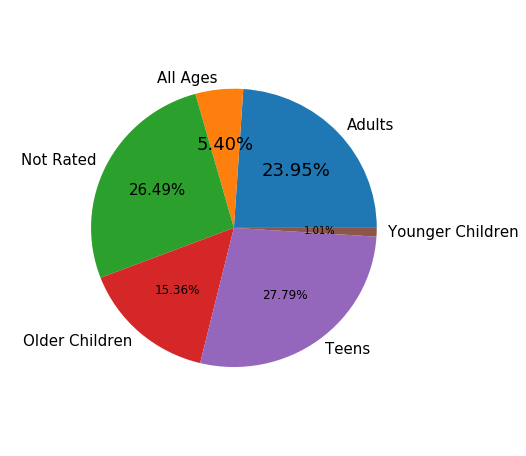

In [106]:
plt.figure(figsize = (8,8))
patches,l_text,p_text = plt.pie(rating_df3['show_id'], labels=rating_df3.index, 
                                autopct = '%.2f%%', radius=0.8, labeldistance=1.08)
# plt.title('Content by Rating Ages', fontsize = 20)
# plt.legend(rating_df.index)
# plt.legend(loc='lower left')

for t in p_text[:2]:
    t.set_size(18)

for t in p_text[2:3]:
    t.set_size(15)
    
for t in p_text[3:5]:
    t.set_size(12)

for t in l_text:
    t.set_size(15)

plt.show()

In [107]:
df4['rating'].value_counts()

Adults              4012
Teens               2650
Older Children      1490
Younger Children     307
All Ages             261
Not Rated             87
Name: rating, dtype: int64

In [108]:
rating_df4 = df4.groupby('rating')[['show_id']].count()
rating_df4

,show_id
rating,
Adults,4012
All Ages,261
Not Rated,87
Older Children,1490
Teens,2650
Younger Children,307


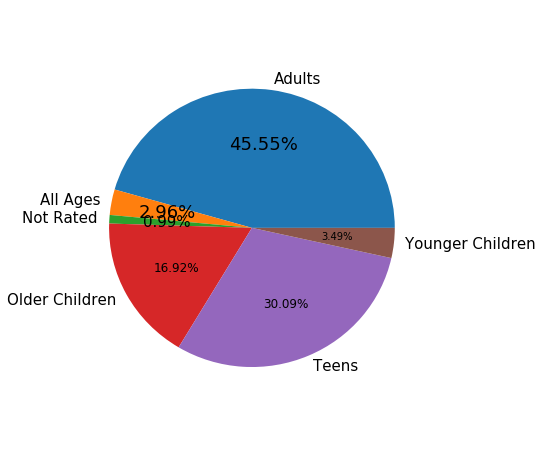

In [109]:
plt.figure(figsize = (8,8))
patches,l_text,p_text = plt.pie(rating_df4['show_id'], labels=rating_df4.index, 
                                autopct = '%.2f%%', radius=0.8, labeldistance=1.08)
# plt.title('Content by Rating Ages', fontsize = 20)
# plt.legend(rating_df.index)
# plt.legend(loc='lower left')

for t in p_text[:2]:
    t.set_size(18)

for t in p_text[2:3]:
    t.set_size(15)
    
for t in p_text[3:5]:
    t.set_size(12)

for t in l_text:
    t.set_size(15)

plt.show()

### Duration

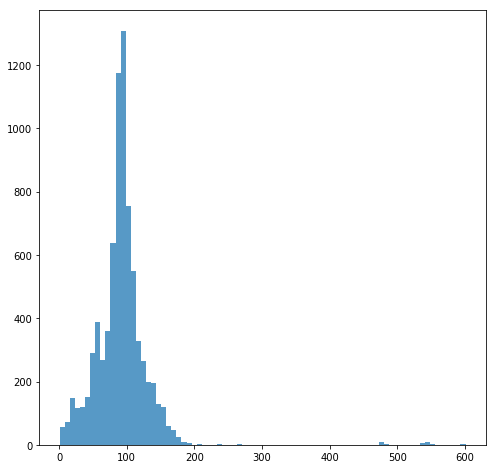

In [110]:
plt.figure(figsize=(8, 8))
plt.hist(df1[df1['duration'] > 0]['duration'].values, bins=80, alpha=0.75)
plt.show()

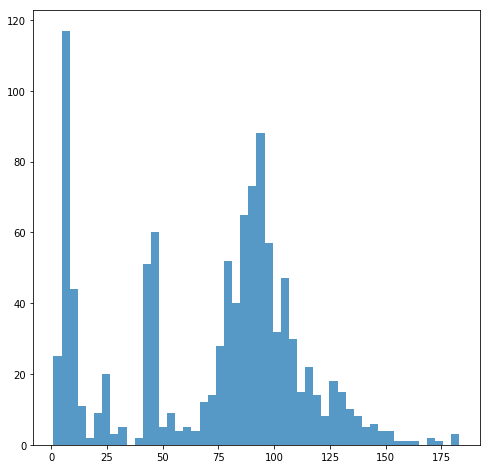

In [111]:
plt.figure(figsize=(8, 8))
plt.hist(df2[df2['duration'] > 0]['duration'].values, bins=50, alpha=0.75)
plt.show()

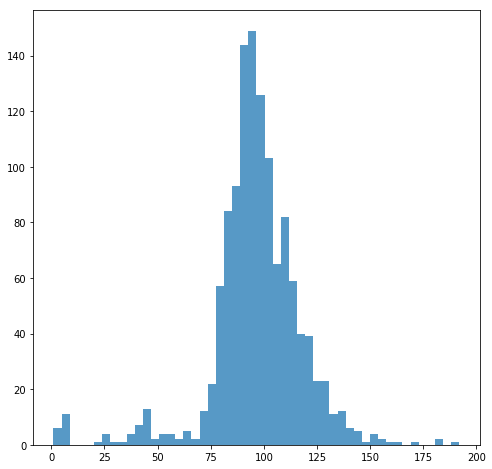

In [112]:
plt.figure(figsize=(8, 8))
plt.hist([df3[df3['duration'] > 0]['duration'].values], bins=50, alpha=0.75)
plt.show()

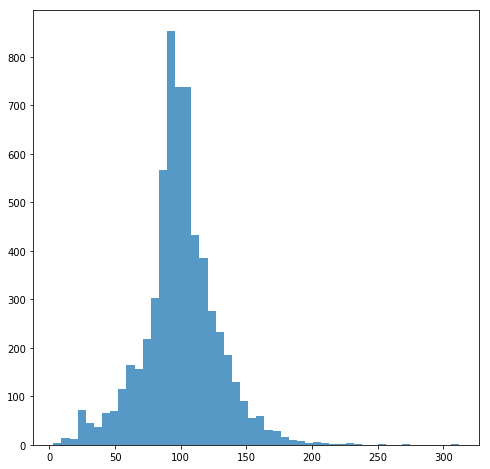

In [113]:
plt.figure(figsize=(8, 8))
plt.hist([df4[df4['duration'] > 0]['duration'].values], bins=50, alpha=0.75)
plt.show()

In [114]:
df_duration = pd.concat([df1[df1['duration'] > 0]['duration'].describe(),
                         df2[df2['duration'] > 0]['duration'].describe(),
                         df3[df3['duration'] > 0]['duration'].describe(),
                         df4[df4['duration'] > 0]['duration'].describe()], axis=1)
df_duration

,duration,duration,duration,duration
count,7804.000000,1052.000000,1235.000000,6131.000000
mean,91.428883,71.910646,96.501215,99.564998
std,40.226154,40.595585,21.630512,28.289504
min,1.000000,1.000000,1.000000,3.000000
25%,75.000000,44.000000,88.000000,87.000000
50%,91.000000,85.000000,96.000000,98.000000
75%,106.000000,98.000000,108.000000,114.000000
max,601.000000,183.000000,192.000000,312.000000


### Season

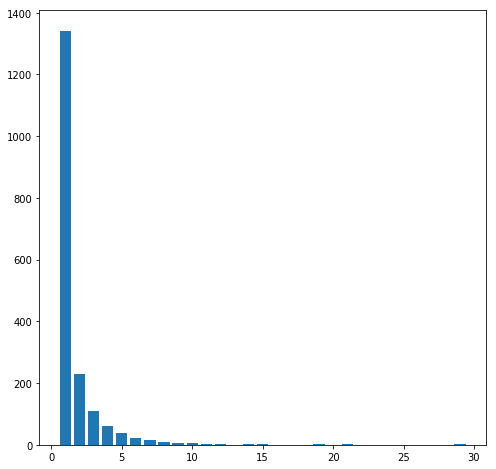

In [115]:
plt.figure(figsize=(8, 8))
plt.bar(df1['season'].value_counts()[1:].index, df1['season'].value_counts()[1:])
plt.show()

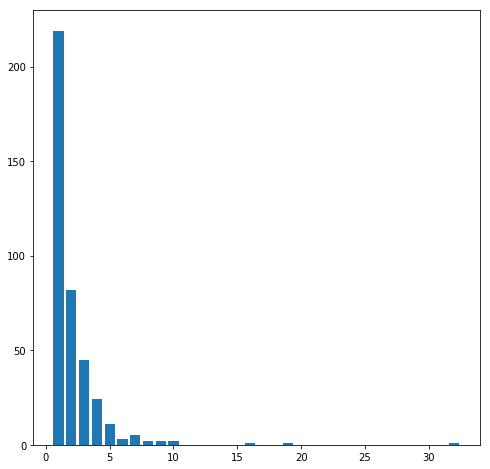

In [116]:
plt.figure(figsize=(8, 8))
plt.bar(df2['season'].value_counts()[1:].index, df2['season'].value_counts()[1:])
plt.show()

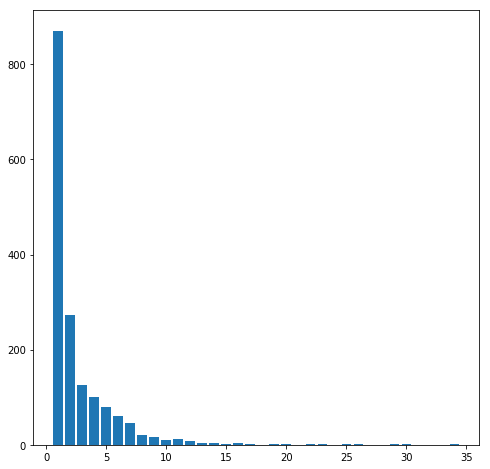

In [117]:
plt.figure(figsize=(8, 8))
plt.bar(df3['season'].value_counts()[1:].index, df3['season'].value_counts()[1:])
plt.show()

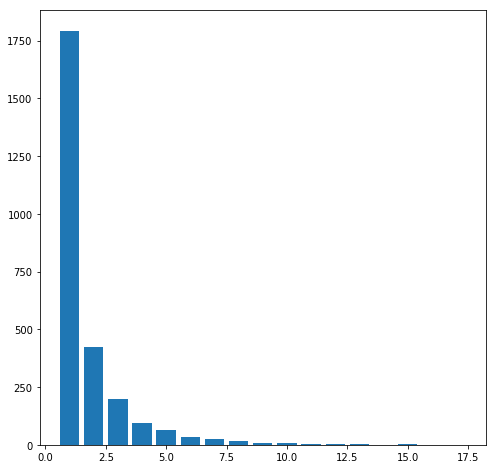

In [118]:
plt.figure(figsize=(8, 8))
plt.bar(df4['season'].value_counts()[1:].index, df4['season'].value_counts()[1:])
plt.show()

In [119]:
df_season = pd.concat([df1[df1['season'] > 0]['season'].describe(),
                       df2[df2['season'] > 0]['season'].describe(),
                       df3[df3['season'] > 0]['season'].describe(),
                       df4[df4['season'] > 0]['season'].describe()], axis=1)
df_season

,season,season,season,season
count,1854.000000,398.000000,1651.000000,2676.000000
mean,1.723301,2.118090,2.688068,1.764948
std,1.821656,2.411898,3.155405,1.582752
min,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000
75%,2.000000,2.000000,3.000000,2.000000
max,29.000000,32.000000,34.000000,17.000000


### Release year

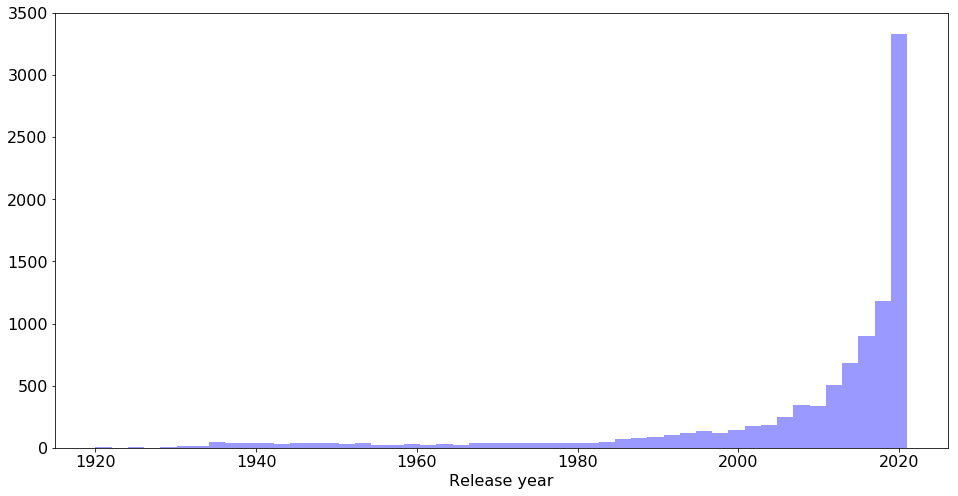

In [120]:
plt.subplots(figsize=(16, 8))
sns.distplot(df1['release_year'], kde=False, color='b')
plt.xlabel('Release year', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [121]:
release_year1 = df1.groupby('release_year')[['show_id']].count()
release_year1

,show_id
release_year,
1920,3
1922,2
1923,1
1924,1
1925,8
1926,2
1927,1
1929,4
1930,5


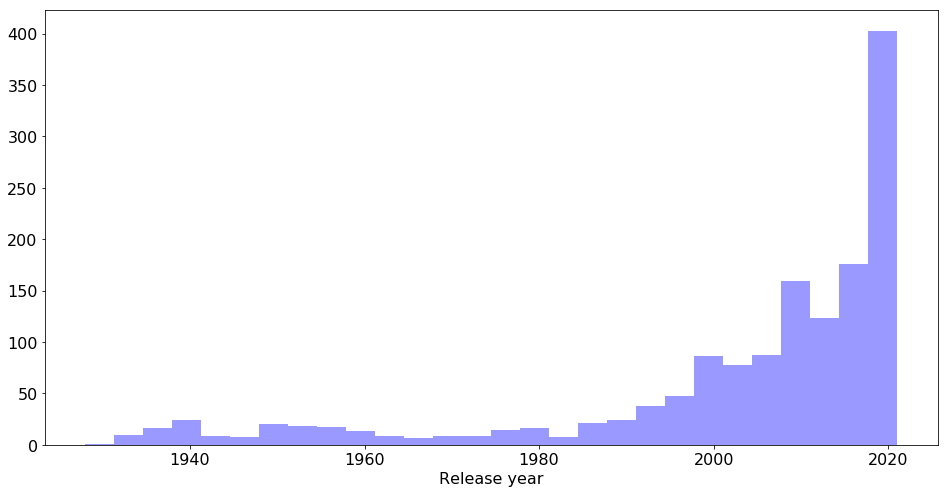

In [122]:
plt.subplots(figsize=(16, 8))
sns.distplot(df2['release_year'], kde=False, color='b')
plt.xlabel('Release year', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [123]:
release_year2 = df2.groupby('release_year')[['show_id']].count()
release_year2

,show_id
release_year,
1928,1
1932,3
1933,3
1934,4
1935,4
1936,6
1937,6
1938,5
1939,5


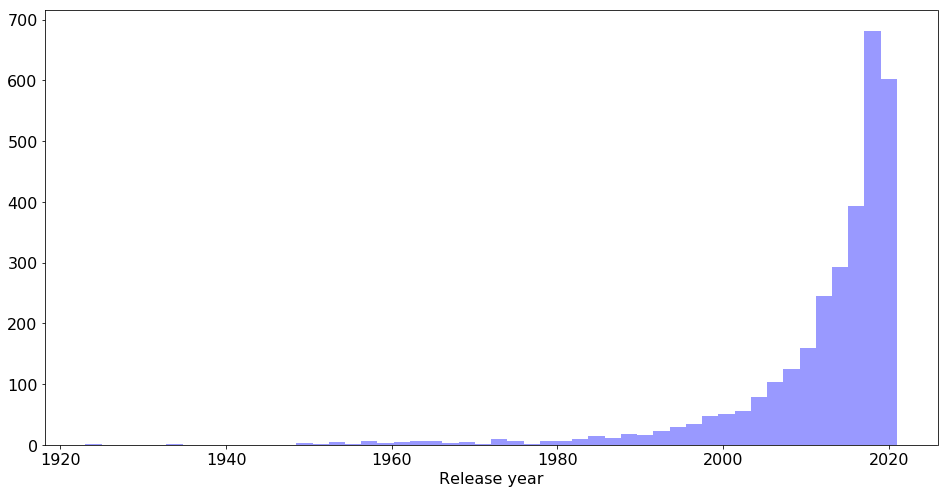

In [124]:
plt.subplots(figsize=(16, 8))
sns.distplot(df3['release_year'], kde=False, color='b')
plt.xlabel('Release year', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [125]:
release_year3 = df3.groupby('release_year')[['show_id']].count()
release_year3

,show_id
release_year,
1923,1
1933,1
1950,3
1951,2
1953,4
1954,1
1955,2
1957,4
1958,2


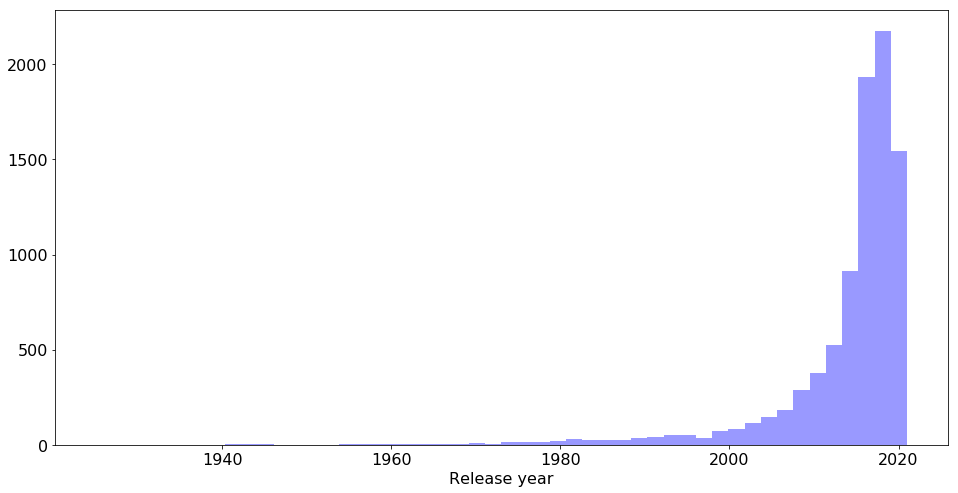

In [126]:
plt.subplots(figsize=(16, 8))
sns.distplot(df4['release_year'], kde=False, color='b')
plt.xlabel('Release year', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [127]:
release_year4 = df4.groupby('release_year')[['show_id']].count()
release_year4

,show_id
release_year,
1925,1
1942,2
1943,3
1944,3
1945,4
1946,2
1947,1
1954,2
1955,3


### Genres

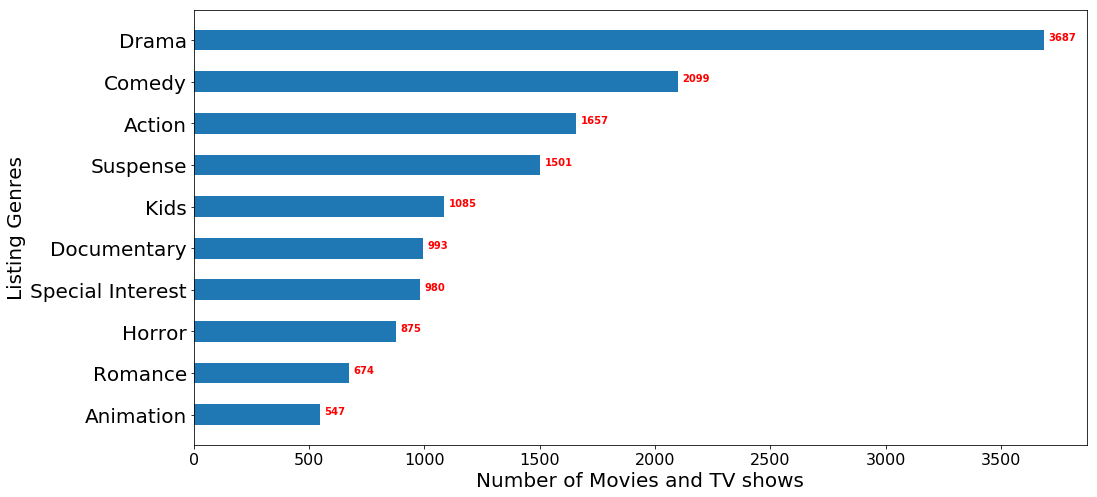

In [128]:
# top10 listing genres
plt.figure(figsize = (16, 8))
plt.barh(listed_df1.name[:10][::-1], width = listed_df1['count'][:10][::-1], height = 0.5)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 20)
plt.xlabel('Number of Movies and TV shows', fontsize = 20)
plt.ylabel('Listing Genres', fontsize = 20)
for h, v in enumerate(listed_df1['count'][:10][::-1]):
    plt.text(v + 20, h, str(v), color='r', fontweight='bold')
plt.show()

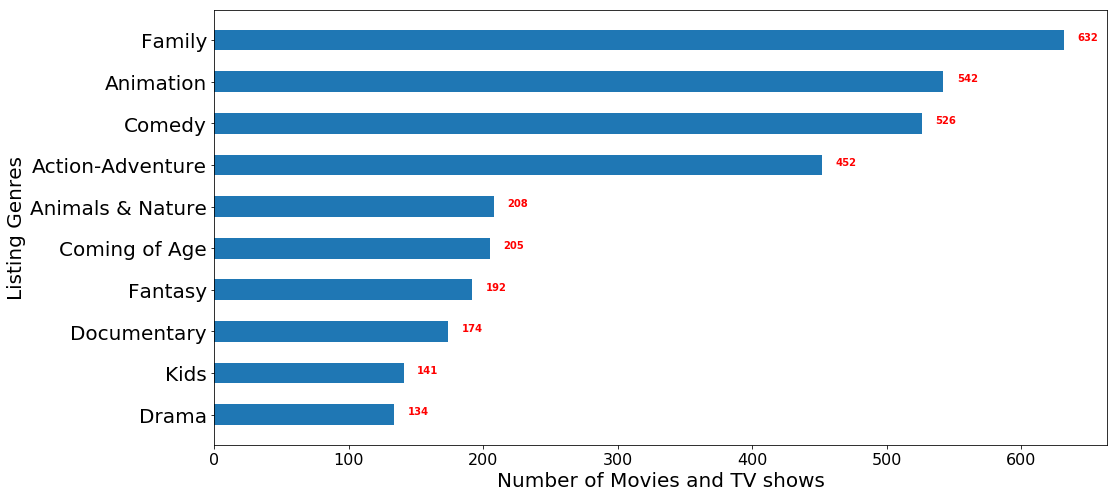

In [129]:
# top10 listing genres
plt.figure(figsize = (16, 8))
plt.barh(listed_df2.name[:10][::-1], width = listed_df2['count'][:10][::-1], height = 0.5)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 20)
plt.xlabel('Number of Movies and TV shows', fontsize = 20)
plt.ylabel('Listing Genres', fontsize = 20)
for h, v in enumerate(listed_df2['count'][:10][::-1]):
    plt.text(v + 10, h, str(v), color='r', fontweight='bold')
plt.show()

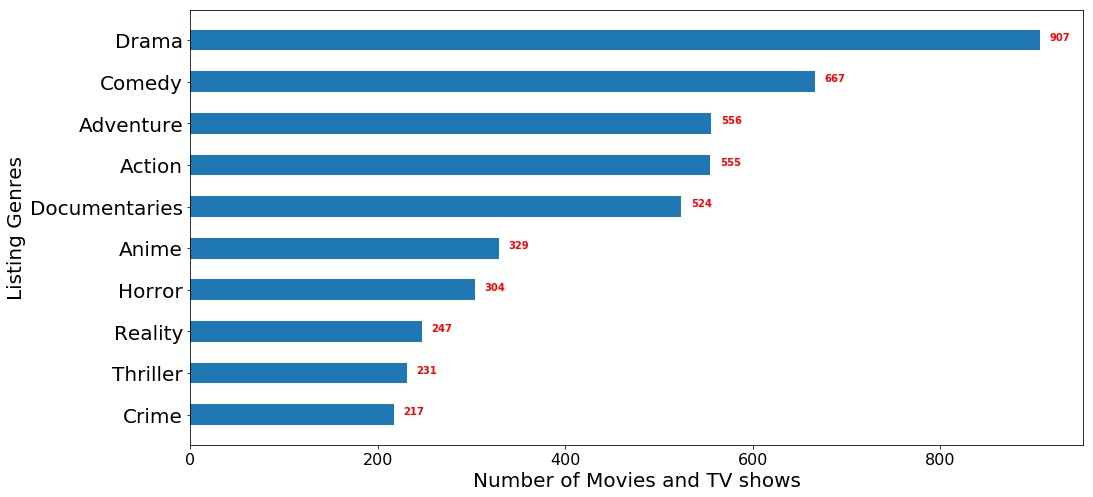

In [130]:
# top10 listing genres
plt.figure(figsize = (16, 8))
plt.barh(listed_df3.name[:10][::-1], width = listed_df3['count'][:10][::-1], height = 0.5)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 20)
plt.xlabel('Number of Movies and TV shows', fontsize = 20)
plt.ylabel('Listing Genres', fontsize = 20)
for h, v in enumerate(listed_df3['count'][:10][::-1]):
    plt.text(v + 10, h, str(v), color='r', fontweight='bold')
plt.show()

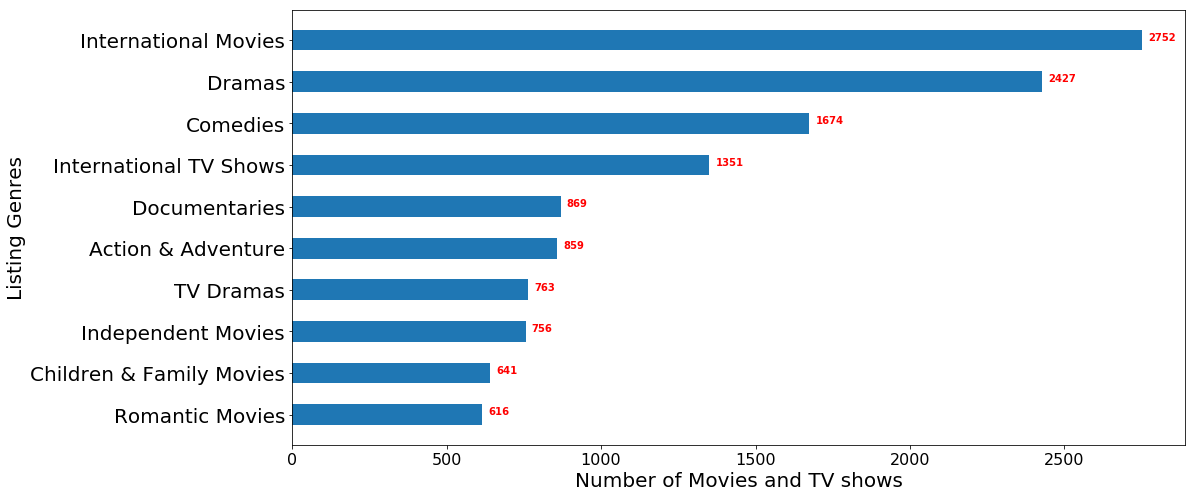

In [131]:
# top10 listing genres
plt.figure(figsize = (16, 8))
plt.barh(listed_df4.name[:10][::-1], width = listed_df4['count'][:10][::-1], height = 0.5)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 20)
plt.xlabel('Number of Movies and TV shows', fontsize = 20)
plt.ylabel('Listing Genres', fontsize = 20)
for h, v in enumerate(listed_df4['count'][:10][::-1]):
    plt.text(v + 20, h, str(v), color='r', fontweight='bold')
plt.show()

## Trend of movies and TV shows in online platforms

### Year added

In [132]:
movie_year_added = df[df.type=='Movie'].groupby('year_added')[['show_id']].count()[1:]
movie_year_added

,show_id
year_added,
2008,1
2009,2
2010,1
2011,13
2012,4
2013,9
2014,30
2015,64
2016,258


In [133]:
tv_year_added = df[df.type=='TV Show'].groupby('year_added')[['show_id']].count()[1:]
tv_year_added

,show_id
year_added,
2006,1
2008,3
2009,7
2010,12
2011,16
2012,15
2013,36
2014,43
2015,87


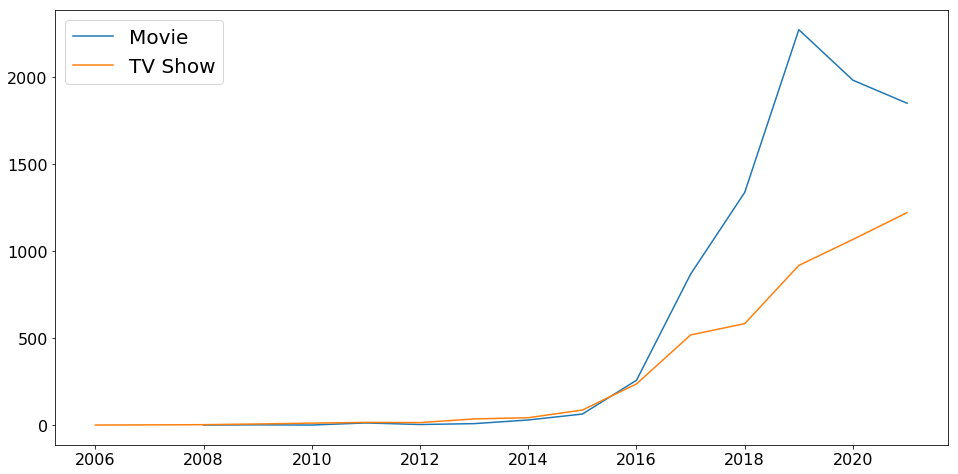

In [134]:
plt.figure(figsize = (16, 8))
plt.plot(movie_year_added, label='Movie')
plt.plot(tv_year_added, label='TV Show')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
# plt.title('Number of Movies and TV shows Added Each Year', fontsize = 20)
plt.legend(loc='upper left', fontsize=20)
plt.show()

### Month added

In [135]:
movie_month_added = df[df.type=='Movie'].groupby('month_added')[['show_id']].count()[1:]
movie_month_added

,show_id
month_added,
1,656
2,496
3,632
4,718
5,583
6,646
7,800
8,675
9,696


In [136]:
tv_month_added = df[df.type=='TV Show'].groupby('month_added')[['show_id']].count()[1:]
tv_month_added

,show_id
month_added,
1,369
2,293
3,346
4,353
5,370
6,395
7,449
8,401
9,504


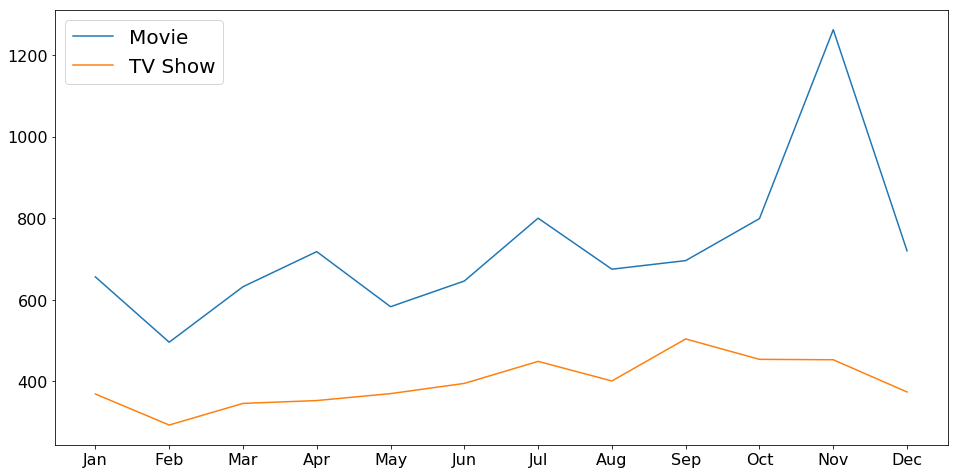

In [137]:
plt.figure(figsize = (16, 8))
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.plot(month, movie_month_added, label='Movie')
plt.plot(month, tv_month_added, label='TV Show')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
# plt.title('Number of Movies and TV shows Added Each Year', fontsize = 20)
plt.legend(loc='upper left', fontsize=20)
plt.show()